# urbansound8k dataset + librosa package
- https://urbansounddataset.weebly.com/urbansound8k.html
- 8732 audio files of urban sounds (see description above) in WAV format

In [4]:
import numpy as np
import pandas as pd

import librosa as lb
import librosa.display as display
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [15]:
metadata.head(2)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing


In [27]:
classes = metadata['class'].unique()
classes

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [39]:
print('records number for each class:')
for idx,class_name in enumerate(classes):
    count = metadata[metadata['class']==class_name].shape[0]
    print('class %i %s: %i'%(idx, class_name, count))

records number for each class:
class 0 dog_bark: 1000
class 1 children_playing: 1000
class 2 car_horn: 429
class 3 air_conditioner: 1000
class 4 street_music: 1000
class 5 gun_shot: 374
class 6 siren: 929
class 7 engine_idling: 1000
class 8 jackhammer: 1000
class 9 drilling: 1000


In [16]:
import os
def getpath(directory,fold_num,file_name):
    foldpath = os.path.join(directory,'fold')+str(fold_num)
    return(os.path.join(foldpath,file_name))

In [100]:
pwd = %pwd
directory = os.path.join(pwd, 'UrbanSound8K/audio/')
getpath(directory,fold_num=5,file_name='100032-3-0-0.wav')

'/Users/jr/Desktop/1003_ML/hw/hw6/hw6-trees/UrbanSound8K/audio/fold5/100032-3-0-0.wav'

## 5.1 load audio file and plot

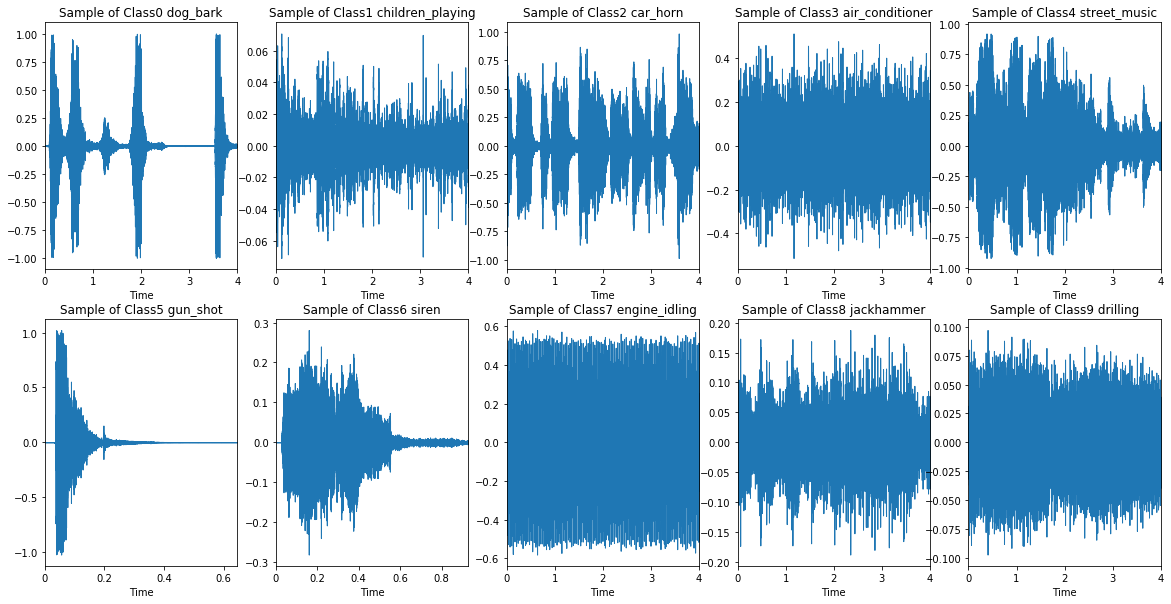

In [78]:
# load random audio file from each class,plot waves and linear-frequency power spectrogram
import random
rand = random.randint(0, 374) 
plt.figure(figsize=(20,10))

for idx,class_name in enumerate(classes):
    df1 = metadata[metadata['class']==class_name].iloc[rand]
    file_name = df1['slice_file_name']
    fold_num = df1['fold']
    
    #get path for each random file
    path = getpath(directory,fold_num,file_name)
    sound = lb.load(path)[0]
    
    #generate subplot for each random sample
    plt.subplot(2,5,idx+1)
    display.waveplot(sound)  #Plot the amplitude envelope of a waveform
    plt.title('Sample of Class%s %s'%(idx,class_name))


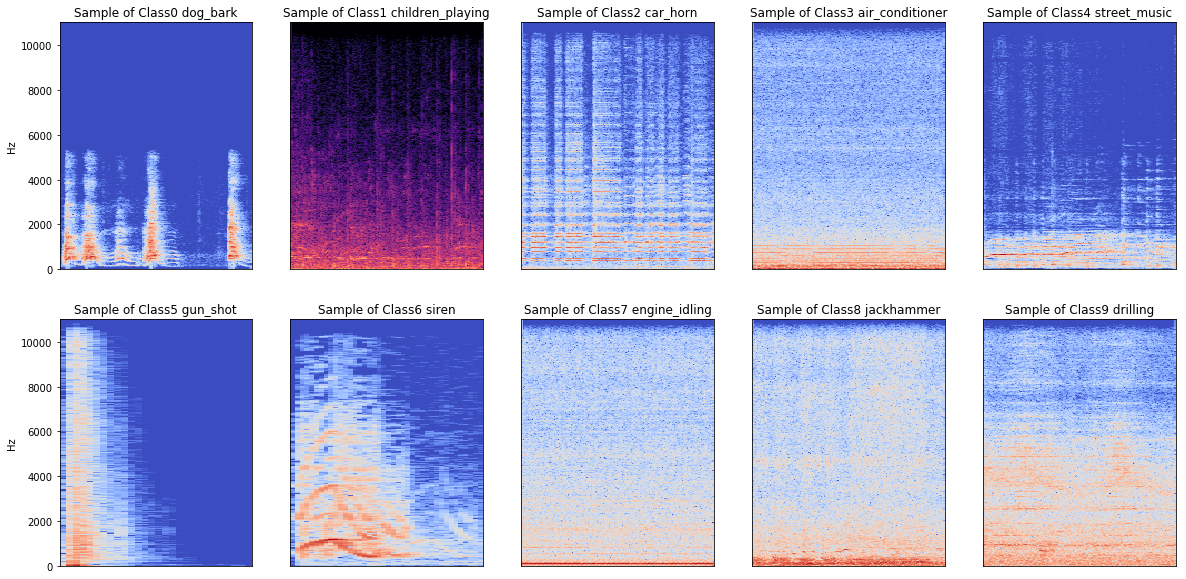

In [93]:
plt.figure(figsize=(20,10))
for idx,class_name in enumerate(classes):
    df1 = metadata[metadata['class']==class_name].iloc[rand]
    file_name = df1['slice_file_name']
    fold_num = df1['fold']
    #get path for each random file
    path = getpath(directory,fold_num,file_name)
    sound = lb.load(path)[0]
    # Compute Short-time Fourier transform (STFT) and convert the amplitude to dB
    s = lb.stft(sound)
    s_dB = lb.amplitude_to_db(np.abs(s))
    #generate subplot for each random sample
    plt.subplot(2,5,idx+1)
    if idx in [0,5]:
        display.specshow(s_dB,y_axis='linear')
    else:
        display.specshow(s_dB)

    plt.title('Sample of Class%s %s'%(idx,class_name))

In [96]:
sample = lb.load('/Users/jr/Desktop/1003_ML/hw/hw6/hw6-trees/UrbanSound8K/audio/fold5/100032-3-0-0.wav') #type:tuple(ndarray,)
x, sampling_rate = sample

In [101]:
#play the audio
from IPython.display import display, Audio
Audio(x,rate=sampling_rate)

## 7.2 MFCC

In [102]:
from librosa.feature import mfcc
from librosa.feature import delta
from sklearn.preprocessing import normalize